<a href="https://colab.research.google.com/github/Suchith-H-C/Deep-Learning-and-Generative-AI-Lab/blob/main/Week3_Deep_forward_Neural_Network_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-3:** Design Deep forward Neural Network for image classification
- Design and implement an Image classification model to classify a dataset of images using Deep
   Feed Forward NN.
- Use the MNIST datasets.
- Record the accuracy corresponding to the number of epochs 5, 50, 100.
- Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.


MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


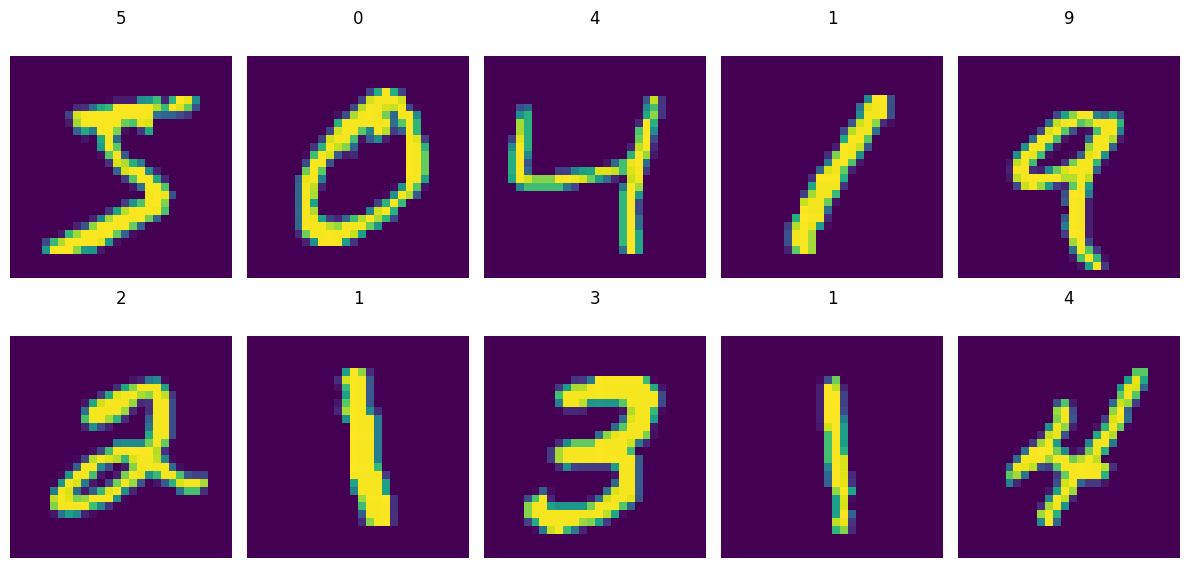

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8798 - loss: 0.3937 - val_accuracy: 0.9576 - val_loss: 0.1475
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9633 - loss: 0.1218 - val_accuracy: 0.9653 - val_loss: 0.1224
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9737 - loss: 0.0827 - val_accuracy: 0.9732 - val_loss: 0.0951
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9788 - loss: 0.0629 - val_accuracy: 0.9693 - val_loss: 0.1016
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9695 - val_loss: 0.1175
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Summary:


Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.97      0.98      5958
           3       0.98      0.97      0.98      6131
           4       0.97      0.99      0.98      5842
           5       0.99      0.96      0.98      5421
           6       0.98      0.99      0.99      5918
           7       0.99      0.98      0.99      6265
           8       0.94      0.98      0.96      5851
           9       0.98      0.97      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.9

In [2]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12, 6), facecolor='white')
n = 0
for i in range(0, 2):
    for j in range(0, 5):
        axs[i, j].matshow(X_train[n])
        axs[i, j].set(title=str(y_train[n]))
        axs[i, j].axis('off')  # Hide axis
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes after reshaping
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep Feed-Forward Neural Network architecture
model = Sequential(name="DFF-Model")  # Model
model.add(Input(shape=(784,), name='Input-Layer'))  # Input Layer - need to specify the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile keras model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1,
          validation_split=0.2, shuffle=True)

# Apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))

# Predict class labels on test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Performance Summary
print("\nModel Summary:")
model.summary()
print("")

# Evaluate model performance on training and test data
print('---------- Evaluation on Training Data -----------')
print(classification_report(y_train, pred_labels_tr))
print("")
print('---------- Evaluation on Test Data -----------')
print(classification_report(y_test, pred_labels_te))
print("")


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.
